### 1. Load the dataset from a CSV file named sample_dataset.csv into a Pandas DataFrame and display the first few rows.

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('sample_dataset.csv')

# Display the first few rows
print(data.head())


   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


### 2. Generate summary statistics for this dataset. What are the mean and standard deviation of the Sepal Length?

In [2]:
# Generate summary statistics
summary_statistics = data.describe()

# Mean and standard deviation of Sepal Length
mean_sepal_length = summary_statistics.loc['mean', 'Sepal Length (cm)']
std_sepal_length = summary_statistics.loc['std', 'Sepal Length (cm)']

print(f"Mean Sepal Length: {mean_sepal_length}")
print(f"Standard Deviation of Sepal Length: {std_sepal_length}")


Mean Sepal Length: 5.906666666666666
Standard Deviation of Sepal Length: 0.8737984948051866


### 3. Check for any missing values in the dataset. How would you handle them if there were any?

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handling missing values (if any)
# If there were missing values, we could handle them by:
# 1. Dropping rows with missing values: data = data.dropna()
# 2. Filling missing values with a specific value, such as the mean: data = data.fillna(data.mean())


Missing values in each column:
Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64


### 4. Convert the species labels to numerical values using a mapping dictionary.

In [4]:
# Mapping dictionary
species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}

# Apply mapping
data['Species'] = data['Species'].map(species_mapping)

print(data.head())


   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


### 5. Split the dataset into training and testing sets with 70% training data and 30% testing data. Ensure that the split is stratified based on the species.

In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (10, 4)
Testing set size: (5, 4)


### 6. Train a decision tree classifier on the training data. What parameters would you use for the decision tree?

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Parameters used: default parameters with random_state set to 42


DecisionTreeClassifier(random_state=42)

### 7. Visualize the trained decision tree

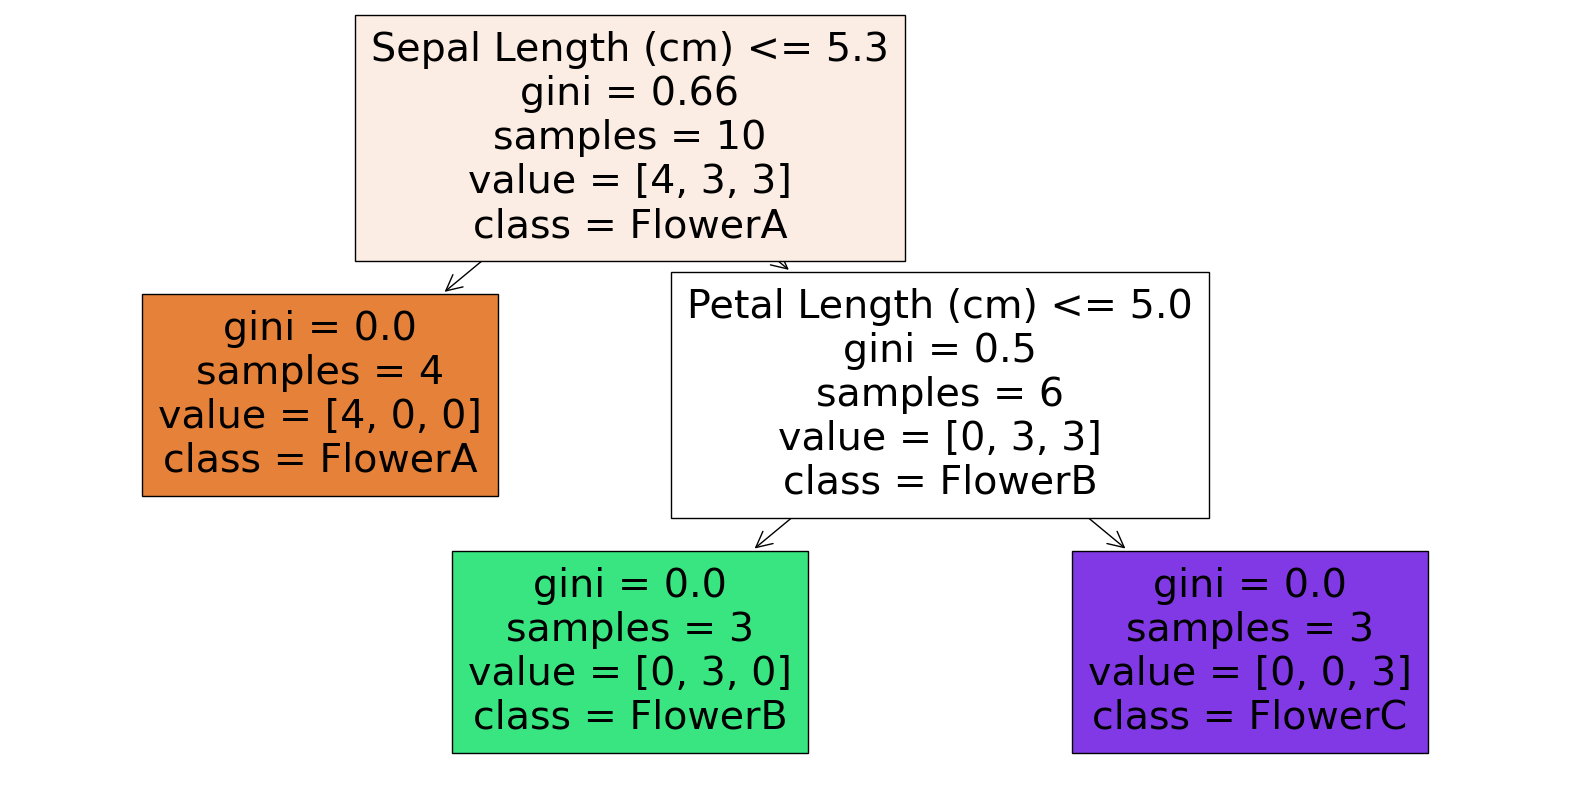

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feature_names, class_names=['FlowerA', 'FlowerB', 'FlowerC'], filled=True)
plt.show()


### 8. Predict the species for the testing data and compute the accuracy.

In [10]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


### 9. Generate a classification report and a confusion matrix for the predictions.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
report = classification_report(y_test, y_pred, target_names=['FlowerA', 'FlowerB', 'FlowerC'])
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       1.00      1.00      1.00         2
     FlowerC       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 2]]
